In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
uber=pd.read_csv("/content/UberDataset.csv")

In [ ]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
uber.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
uber.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [ ]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**Data Cleaning**
1. Seprating Date And Time Form Start_date and End date columns

In [ ]:
uber['DATE']=uber['START_DATE'].str.split(' ',expand=True)[0]

In [ ]:
uber['START_TIME']=uber['START_DATE'].str.split(' ',expand=True)[1]

In [ ]:
uber['End_DATE']=uber['END_DATE'].str.split(' ',expand=True)[0]

In [ ]:
uber['End_Time']=uber['END_DATE'].str.split(' ',expand=True)[1]

In [ ]:
uber.drop(['START_DATE','END_DATE'],inplace=True,axis=1)

1. Arranging The Date in same format some date have different fromat arranging them in one format '/' of both date and end_date

In [ ]:

uber['DATE']=uber['DATE'].str.replace('-','/')

In [ ]:

uber['End_DATE']=uber['End_DATE'].str.replace('-','/')

**START column in dataset contains some symbols in it removeing them**

In [ ]:
uber['START']=uber['START'].str.replace('?','a')

<ipython-input-15-94fe66fdbc0c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  uber['START']=uber['START'].str.replace('?','a')




1.  Converting data type of DATE into datetime
2.  same for End_DATE converting its data type into datetime



In [ ]:
uber['DATE'] = pd.to_datetime(uber['DATE'], errors='coerce')



In [ ]:
uber['End_DATE'] = pd.to_datetime(uber['DATE'], errors='coerce')


In [ ]:
# uber['START_TIME'] = pd.to_datetime(uber['START_TIME'], errors='coerce')


In [ ]:
# uber['End_Time'] = pd.to_datetime(uber['End_Time'], errors='coerce')


**Unique Values in purpose**

In [ ]:
weather= uber['PURPOSE'].unique()
for weathers in weather:
    print("->",weathers)

-> Meal/Entertain
-> nan
-> Errand/Supplies
-> Meeting
-> Customer Visit
-> Temporary Site
-> Between Offices
-> Charity ($)
-> Commute
-> Moving
-> Airport/Travel


In [ ]:
plt.style.use("ggplot")


**What is the average distance traveled per CATEGORIES in this dataset?**

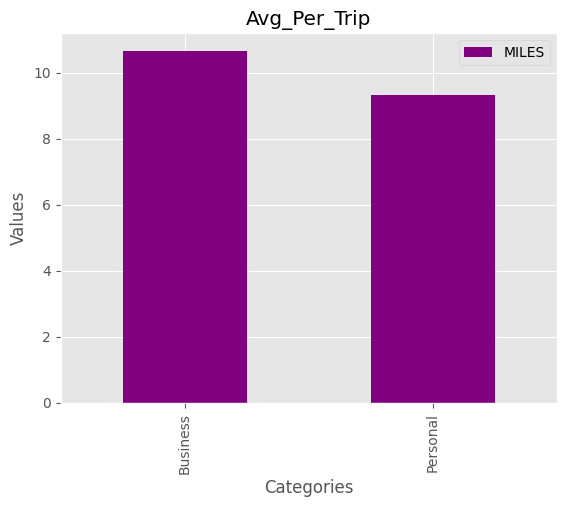

In [ ]:
uber.groupby('CATEGORY').agg({'MILES':'mean'}).plot(kind='bar',color='purple')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Avg_Per_Trip')
plt.legend();




**How does the average trip distance differ between  trips with a purpose and those without a specified purpose?**

In [ ]:
uber.groupby('PURPOSE').agg({'MILES':'mean'})['MILES'].sum()

272.3710318392133

In [ ]:
uber[uber['PURPOSE'].isna()]['MILES'].mean()

33.99244532803181

**Conclusion:-**

* The avg ditance travelled by some purpose is around 272 km and the avg distance travelled by without any purpose is around 33 km

***How does the average trip distance differ between Business trips with a purpose and those without a specified purpose?***

In [ ]:
df1=uber[uber['CATEGORY']=='Business']

In [ ]:
df1[df1['PURPOSE'].isna()]['MILES'].mean()

10.18399071925754

In [ ]:
df1[~(df1['PURPOSE'].isna())]['MILES'].mean()

10.970170015455952

**How many unique categories of trips are present in the dataset?**

In [ ]:
uber['CATEGORY'].unique()

array(['Business', 'Personal', nan], dtype=object)

**What is the most common purpose for business trips in this dataset?**

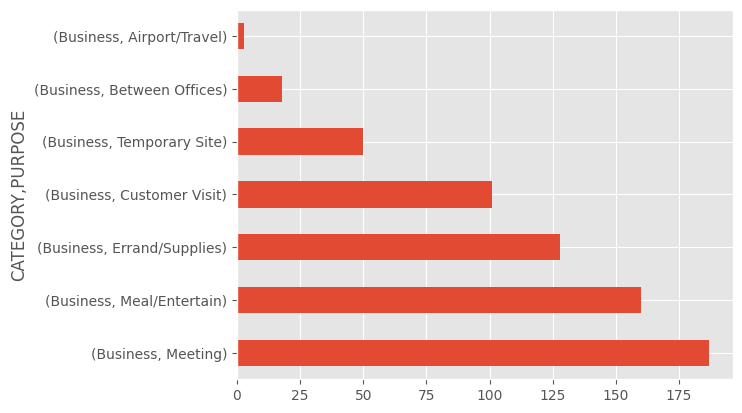

In [ ]:
df1.groupby('CATEGORY')['PURPOSE'].value_counts().sort_values(ascending=False).plot(kind='barh');

**Conclusion:-**
*   The most common purpose for the business trip is meeting and second highest is Meal/Entertain



**Which date has the highest total miles traveled?**

In [ ]:
uber.groupby('DATE').agg({'MILES':'sum'}).sort_values(by='MILES',ascending=False).head(1)

,MILES
DATE,
2016-03-25,655.3


**Conclusion:-**
*   2016-03-25 has the highest miles around 665.3 km


**What is the total number of miles traveled for all trips combined?**


In [ ]:
uber['MILES'].sum()

24409.4

**Conclusion:-**
1. Total number of travled by combined all trips is equal to 24409.4 km



**How many trips were made for the purpose of "Meal/Entertain"?**

In [ ]:
meal_entertain_trips = uber[uber['PURPOSE'] == 'Meal/Entertain']

num_meal_entertain_trips = meal_entertain_trips.shape[0]

print("Number of trips for the purpose of 'Meal/Entertain':", num_meal_entertain_trips)


Number of trips for the purpose of 'Meal/Entertain': 160


**Is there a noticeable pattern or trend in the distance traveled over the months covered in the dataset?**

In [ ]:
uber['month_name']=uber['DATE'].dt.strftime('%B')

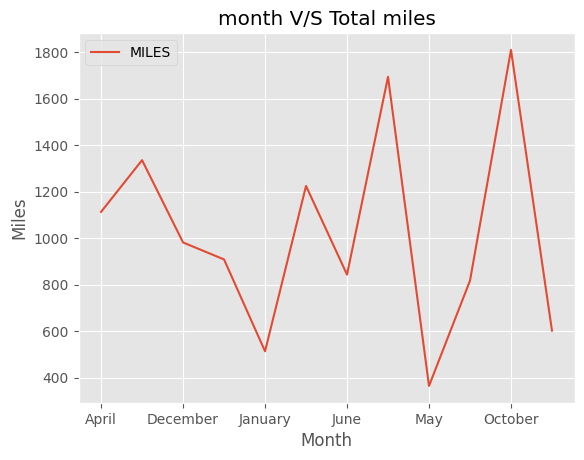

In [ ]:
uber.groupby('month_name').agg({'MILES':'sum'}).sort_values(by='month_name',ascending=True).plot(kind='line')
plt.title('month V/S Total miles')
plt.xlabel('Month')
plt.ylabel('Miles');


**Which location (START or STOP) is more frequently visited in the dataset?**

In [ ]:
uber['START'].value_counts().head(1)

Cary    201
Name: START, dtype: int64

In [ ]:
uber['STOP'].value_counts().sort_values(ascending=False).head(1)

Cary    203
Name: STOP, dtype: int64

***What is the average duration of trips in hours and minutes?***

In [ ]:
# aranging starting hour  in seprate column called Hour
uber['Hour']=uber['START_TIME'].str.split(':',expand=True)[0]

In [ ]:
#aranging starting minutes in seprate column called minutes
uber['minute']=uber['START_TIME'].str.split(':',expand=True)[1]

In [ ]:
#aranging ending hour in seprate column called end_hour
uber['End_Hour']=uber['End_Time'].str.split(':',expand=True)[0]

In [ ]:
#aranging ending hour in seprate column called end
uber['End_minute']=uber['End_Time'].str.split(':',expand=True)[1]

In [ ]:
uber.drop(['START_TIME','End_Time'],inplace=True,axis=1)

**What is the average duration of trips in hours and minutes?**

**conversion of hours and miniutes into numeric data type and same for end_hour and end_minutes**

In [ ]:
uber['Hour']=pd.to_numeric(uber['Hour'], errors='coerce').astype('Int64')

In [ ]:
uber['minute']=pd.to_numeric(uber['minute'], errors='coerce').astype('Int64')

In [ ]:
uber['End_minute']=pd.to_numeric(uber['End_minute'], errors='coerce').astype('Int64')

In [ ]:
uber['End_Hour']=pd.to_numeric(uber['End_Hour'], errors='coerce').astype('Int64')

**Calculate Duration:**

In [ ]:
uber['total_duration']=uber['Hour']*60+uber['minute']-uber['End_Hour']*60+uber['End_minute']

**Calculate Average Duration:**

In [ ]:
uber['total_duration'].sum()/uber['START'].value_counts().sum()

52.2008658008658

**Convert Average Duration to Hours and Minutes**

1.   **average_duration_hours**
2.   **average_duration_remainder_minutes**



In [ ]:
hour=(uber['total_duration'].sum()/uber['START'].value_counts().sum())//60

In [ ]:
minute=round((uber['total_duration'].sum()/uber['START'].value_counts().sum())%60)
print('The Average duration for trip in data set is',hour,'Hours and ',minute,'minutes')

The Average duration for trip in data set is 0.0 Hours and  52 minutes


**Day of the Week**

In [ ]:
uber['START_DAY'] = uber['DATE'].dt.day_name()
uber['END_DAY'] = uber['End_DATE'].dt.day_name()

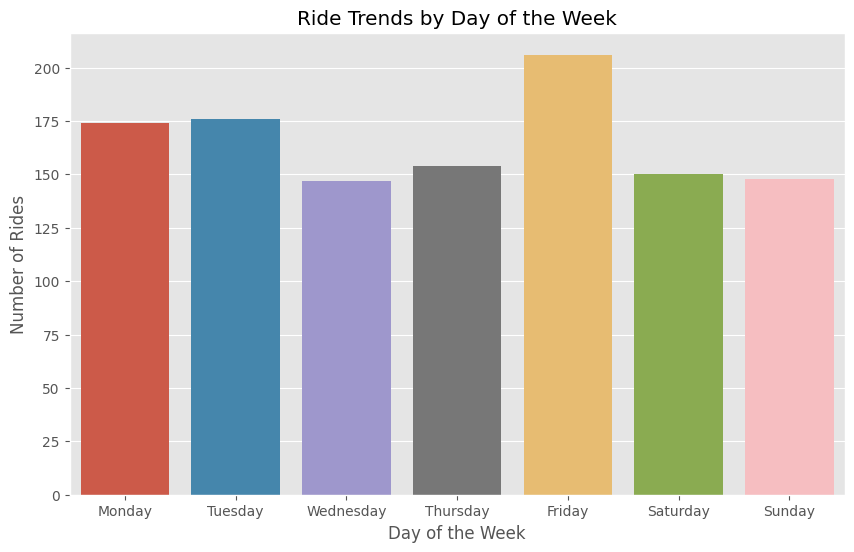

In [ ]:
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.countplot(x='START_DAY', data=uber, order=day_of_week_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Ride Trends by Day of the Week')
plt.show()

Exploration missing values

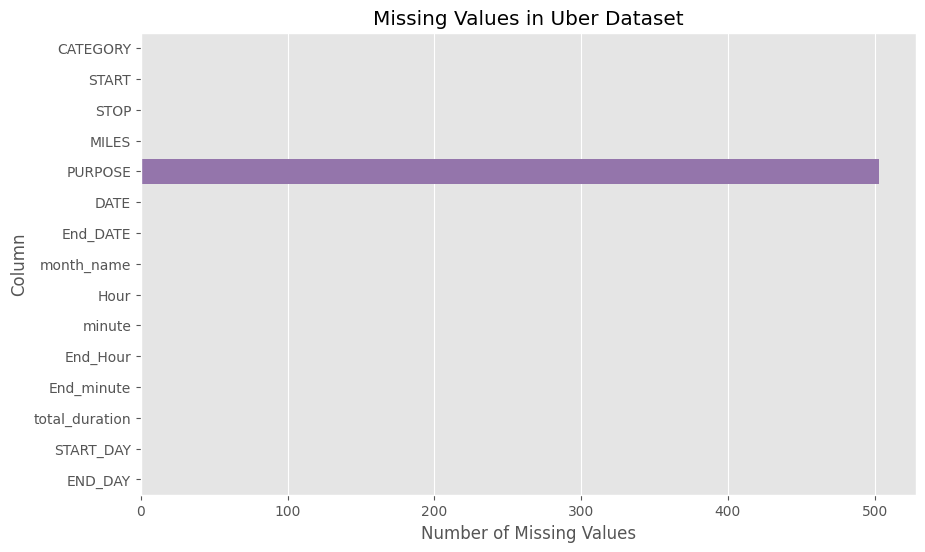

In [ ]:
missing_values = uber.isnull().sum()

# Plot the missing values using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette='muted')
plt.title('Missing Values in Uber Dataset')
plt.xlabel('Number of Missing Values')
plt.ylabel('Column')
plt.show()